In [1]:
!pip install -q lifelines

In [2]:
import numpy as np
import pandas as pd
# visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

T = df['T']
E = df['E']
df.head()

T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137

In [4]:
df.E.value_counts()

1    156
0      7
Name: E, dtype: int64

- T... duration
- E ... binary. 1„ÅåÊ≠ª„ÇíÊÑèÂë≥„Åô„Çã(?) „Ç§„Éô„É≥„Éà

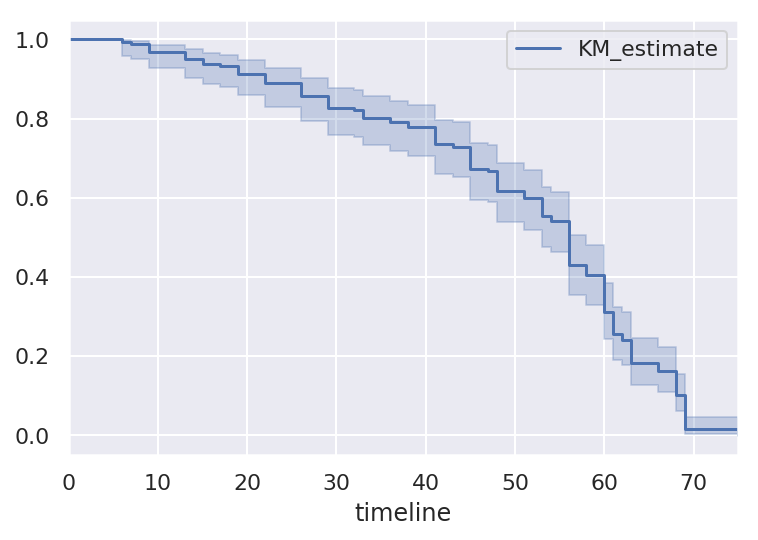

In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)
kmf.plot_survival_function()
# „Åì„ÅÆplot„ÇíÊèè„Åè„Åü„ÇÅ„ÅÆÊÉÖÂ†±„ÅØ
# kmf.survival_function_

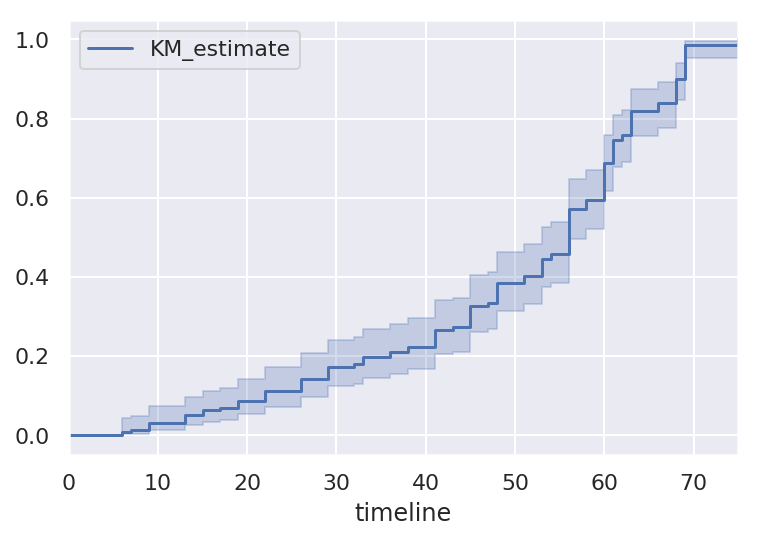

In [6]:
kmf.plot_cumulative_density()
# kmf.cumulative_density_

ÂçäÂàÜÊ≠ª„Å¨duration„ÅØmedian_survival_time_„Å´Ê†ºÁ¥ç„Åï„Çå„Å¶„ÅÑ„Çã„ÄÇ„Åü„Å†„Åóconfidence interval„ÇíÂá∫„Åô„Å´„ÅØ‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´„Åó„Å™„Åë„Çå„Å∞Ë°å„Åë„Å™„ÅÑ„ÄÇ

In [7]:
print(kmf.median_survival_time_)
from lifelines.utils import median_survival_times
median_survival_times(kmf.confidence_interval_)

56.0


KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    53.0                    58.0

„ÅÑ„Åæ„Åæ„Åß„ÅØduration(timeline)„ÅØ„Éá„Éº„Çø„Åã„ÇâËá™ÂãïÁöÑ„Å´ÂèñÂæó„Åï„Çå„Å¶„ÅÑ„Åü„ÄÇ„Å§„Åæ„Çä„Åù„Çå„ÅØ‰∏ÄÁï™ÂÜóÈï∑„Åß„Å™„ÅèÊÉÖÂ†±„Åå‰πó„Å£„Å¶„ÅÑ„ÇãÊßãÊàê„Å´„Å™„Å£„Å¶„ÅÑ„Çã„ÄÇ„Åó„Åã„Åó„Åì„Çå„ÇíÊåáÂÆö„Åô„Çã„Åì„Å®„ÇÇ„Åß„Åç„Çã„ÄÇ

In [8]:
kmf.fit(T, E, timeline=range(0, 100, 2))
kmf.survival_function_.head()   # index is now the same as range(0, 100, 2)

KM_estimate
timeline             
0.0          1.000000
2.0          1.000000
4.0          1.000000
6.0          0.993865
8.0          0.987730

ÂÖàÁ®ã„ÅØKaplan-Meier„Å®„ÅÑ„ÅÜÊâãÊ≥ï„ÇíÁî®„ÅÑ„Åü„ÄÇ„Åë„Å©‰ªñ„ÅÆÊâãÊ≥ï„ÇÇ‰Ωø„Åà„Çã(„Å®„Åè„Å´„Éë„É©„É°„Éà„É™„ÉÉ„ÇØ„É¢„Éá„É´)

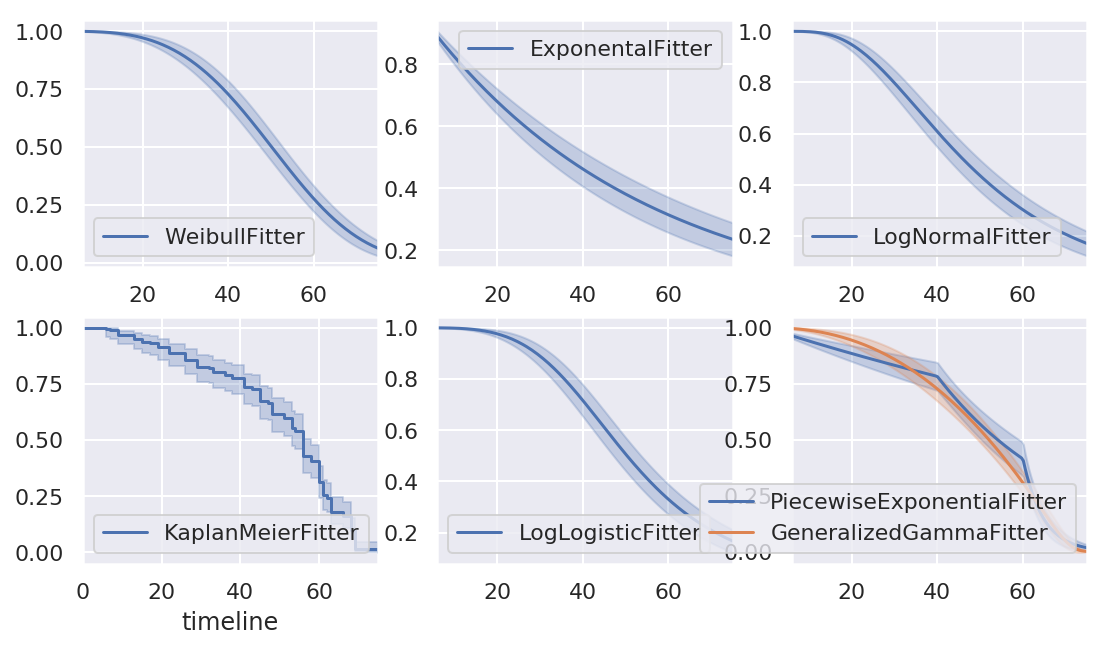

In [9]:
from lifelines import *

fig, axes = plt.subplots(2, 3, figsize=(9, 5))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentalFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
ggf.plot_survival_function(ax=axes[1][2]) #„Åì„Çå„ÅßÈáç„Å≠„Çã‰∫ã„Åå„Åß„Åç„Çã

ÁîüÂ≠òÂàÜÊûê„ÅÆÊØîËºÉ

„Åï„Åç„Åª„Å©„ÅÆ„Éá„Éº„Çø„Å´„ÅØcontrolÁæ§„Å®Êäï‰∏éÁæ§(?)„ÅÆ‰∏°Êñπ„ÅåÂê´„Åæ„Çå„Å¶„ÅÑ„Çã„ÄÇ„Åù„Çå„Çâ„ÇíÊØîËºÉ„Åó„Å¶„Åø„Çà„ÅÜ

In [10]:
df['group'].value_counts()

control    129
miR-137     34
Name: group, dtype: int64

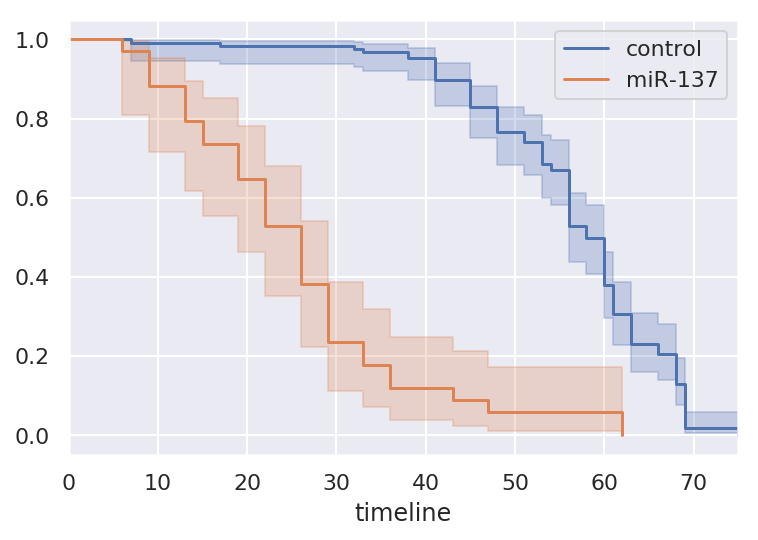

In [11]:
idx= df['group']=='miR-137'

kmf.fit(T[~idx], E[~idx], label='control')
ax = kmf.plot()

kmf.fit(T[idx], E[idx], label='miR-137')
ax = kmf.plot(ax=ax)

„Éá„Éº„Çø„ÅÆÊï¥ÂΩ¢„Å´„Å§„ÅÑ„Å¶

„Çà„Åè„ÅÇ„Çã„Éá„Éº„Çø„ÅÆÂΩ¢Âºè„Å®„Åó„Å¶‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å™Áä∂Ê≥Å„ÅåËÄÉ„Åà„Çâ„Çå„Çã
```
*start_time1*, *end_time1*
*start_time2*, *end_time2*
*start_time3*, None
*start_time4*, *end_time4*
```

„Åì„Çå„ÅØ`lifelines.utils.datetimes_to_durations()`„ÇíÁî®„ÅÑ„Çã„Åì„Å®„ÅßÊï¥ÂΩ¢„ÅåÂèØËÉΩ„Åß„ÅÇ„Çã


```python
from lifelines.utils import datetimes_to_durations
T, E = datetimes_to_durations(start_times, end_times, freq='h')
# start_times is a vector or list of datetime objects or datetime strings
# end_times is a vector or list of (possibly missing) datetime objects or datetime strings
```

ÂêÑÊôÇÂàª„Å´„Åä„Åë„ÇãÁµ±Ë®àÊÉÖÂ†±ÁöÑ„Å™Ôºü

In [12]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(T, E)
table.head()

removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0       163      163
6.0             1         1         0         0      163
7.0             2         1         1         0      162
9.0             3         3         0         0      160
13.0            3         3         0         0      157

In [13]:
df[df['T']==7.0] #„Å©„ÅÜ„ÇÑ„ÇâE==0„Ååcensored„Çâ„Åó„ÅÑ

T  E    group
88  7.0  1  control
89  7.0  0  control

In [14]:
table.tail()

removed  observed  censored  entrance  at_risk
event_at                                                
63.0            9         9         0         0       36
66.0            3         3         0         0       27
68.0           10         9         1         0       24
69.0           13        12         1         0       14
75.0            1         1         0         0        1

Survival regression

Â±ûÊÄß„ÇÑÂØøÂëΩ„Åå‰∏é„Åà„Çâ„Çå„Å¶„ÄÅ„Åù„ÅÆÁîüÂ≠òÂπ¥Êï∞„ÇíÂõûÂ∏∞„Åó„Çà„ÅÜ„Å®„ÅÑ„ÅÜ„ÇÇ„ÅÆ (ÊôÆÈÄö„ÅÆÂõûÂ∏∞„Å®„ÅØ‰Ωï„ÅåÈÅï„ÅÜ„Çì„Å†„Çç„ÅÜÔºü) (ÂàÜÊûêÁõÆÁöÑ„Åã„ÇÇ)

In [15]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()

regression_dataset.head()

var1      var2      var3          T  E
0  0.595170  1.143472  1.571079  14.785652  1
1  0.209325  0.184677  0.356980   7.335846  1
2  0.693919  0.071893  0.557960   5.269797  1
3  0.443804  1.364646  0.374221  11.684092  1
4  1.613324  0.125566  1.921325   7.639492  1

In [16]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary() #R „Å£„ÅΩ„Åô„Åé„ÇãüòÇ #Á∑öÂΩ¢„É¢„Éá„É´„Å£„ÅΩ„ÅÑ

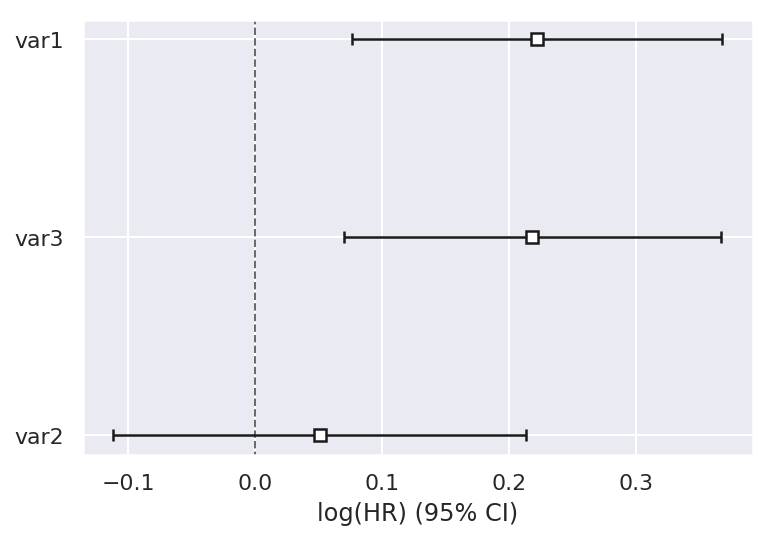

In [17]:
cph.plot()

Âà•„ÅÆ„É¢„Éá„É´

In [18]:
from lifelines import WeibullAFTFitter

wft = WeibullAFTFitter()
wft.fit(regression_dataset, 'T', event_col='E')
wft.print_summary()

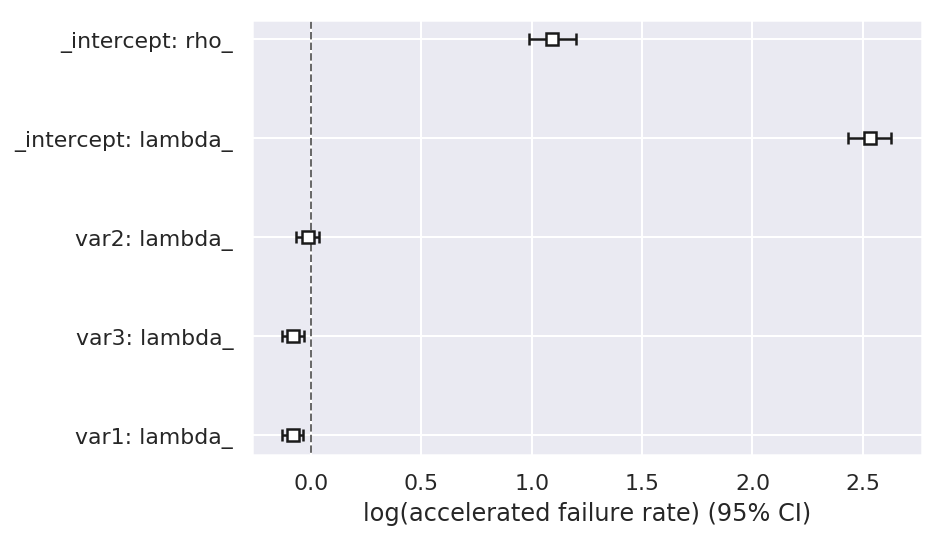

In [19]:
wft.plot()

„Åæ„ÅüÂà•„ÅÆ„É¢„Éá„É´„Åø„Åü„ÅÑ

In [20]:
# Using Aalen's Additive model
from lifelines import AalenAdditiveFitter
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(regression_dataset, 'T', event_col='E')
aaf.print_summary()

       var1      var2      var3
0  0.595170  1.143472  1.571079
1  0.209325  0.184677  0.356980
2  0.693919  0.071893  0.557960
3  0.443804  1.364646  0.374221
4  1.613324  0.125566  1.921325


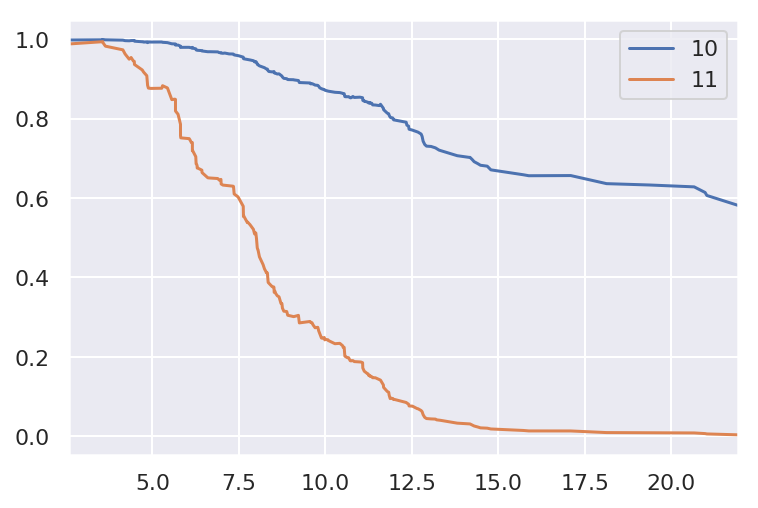

In [21]:
X = regression_dataset.drop(['E', 'T'], axis=1)
print(X.head())
aaf.predict_survival_function(X.iloc[10:12]).plot()  # get the unique survival functions of two subjects
# ÂêÑ„Çµ„É≥„Éó„É´„Å´ÂØæ„Åó„Å¶Êõ≤Á∑ö„ÅåÂæó„Çâ„Çå„Çã„ÅÆ„Åã...

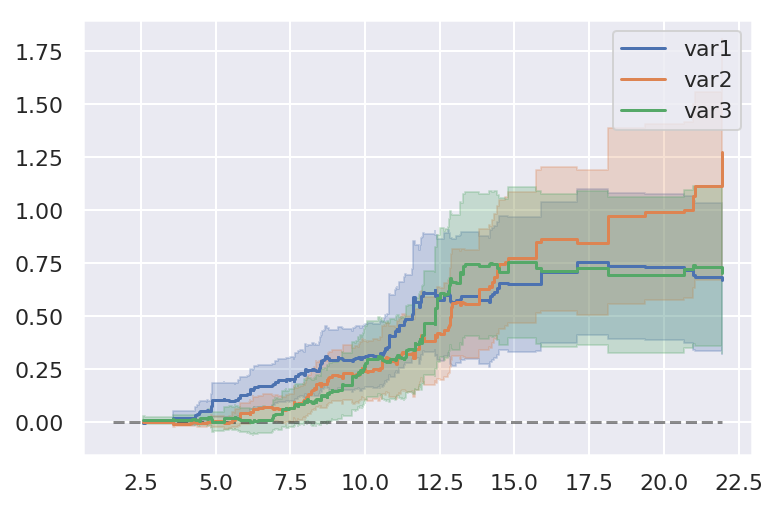

In [22]:
aaf.plot()